![example](images/director_shot.jpeg)

# Microsoft Movie Analysis

**Author:** Karen Ballard
***

## Overview

Microsoft have decided to create a new movie studio and require more insight into which types of films are doing best at the box office. This project uses descriptive statistical analysis on data gathered from IMDb website to gain insight into which combination of genres topped the league in these areas. Three seperate datasets were used for this analysis to gain insight into which combination genres of movies topped the domestic gross sales, foreign gross sales, had the top average ratings and number of votes. The results of the top 20 combination genres in Domestic Sales, Foreign Sales and number of votes was clearly the combination Action, Adventure & Sci-Fi, with adventure being present in the majority of the top 20 of the 3 categories. My recommendation for which type of Movie to produce would be Action, Adventure & Sci-Fi as this is the most predominant combination in the analysis, there were 260 unique genre combinations in this data set after cleaning. I would also highly recommend that Adventure and Action paired with either Animation or Fantasy is a successful combination. In Domestic and Foreign Sales the combination Adventure, Animation & Comedy also faired well which would be my third recommendation. Adventure was clearly a strong genre for popular successful movies.


## Business Problem

Microsoft want to produce movies that are going to be successful in order to make profits, they want to know which types of movies are the most successful. To answer that question both Domestic and Foreign Sales data was analysed to see the most financially successful genres, along with the average rating given and number of votes for each type or genre of movie to see how popularity compared with financial success.

***

## Data Understanding

The data analysed came from IMDb website. IMDb (an acronym for Internet Movie Database) is a popular worldwide online database of infomation relating to all movies, television programs, video games and streaming content online. I used 3 files from IMDb to answer the question of which genres were most successful, mainly focusing on the Domestic and Foreign Gross sales along with average ratings given and number of votes received.


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
#bring in data set bom movie gross
df_movie_gross=pd.read_csv('bom.movie_gross (1).csv.gz')

In [3]:
#see dataframe movie gross
df_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
#bring in dataset imdb titles basic
df_titles_basic=pd.read_csv('imdb.title.basics (1).csv.gz')

In [5]:
#see dataframe imdb titles basic
df_titles_basic.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
#bring in dataset imdb title ratings
df_ratings=pd.read_csv('imdb.title.ratings.csv.gz')

In [7]:
#see dataset title ratings
df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


## Data Preparation

After checking the information on each table to see column names and null values, I joined the two datasets, df_titles_basic_info and df_ratings together using the 'tconst' column as it was a unique identifier creating a new dataframe called joinedimdb. I then joined the dataset df_movie_gross with the new dataframe using the title as the unique identifier, creating a combined new dataset called complete_df.

Checking the information on the new dataframe complete_df, I then cleaned up the null values by removing them, tidied up the "Domestic Gross' and 'Foreign Gross' columns and converted them to units of $ millions for easier readability and analysis. The columns"studio", "original title", and the original domestic and foreign gross columns were deleted as they were not required to carry out this analysis.




In [8]:
#see info and size about dataset movie gross checking on null values
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
#see info and size about data set "titles basic" checking size and null values
df_titles_basic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
#see info and size about dataset "titles ratings" checking size and null values
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


##Joining 3 Data Tables Together

In [11]:
#setting the tcont column in dataset "titles basic" as an index
df_titles_basic.set_index('tconst', inplace=True)

In [12]:
#setting the tconst in dataset "ratings" as an index
df_ratings.set_index('tconst', inplace=True)

In [13]:
#joining titles basic data with ratings data using the tconst as index (unique identifier)
joinedimdb_df=df_titles_basic.join(df_ratings, how='inner')

In [14]:
#see first 5 rows of new combined data set (titles and ratings)
joinedimdb_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [15]:
#set column "title" as index of first dataset "movie gross" 
df_movie_gross.set_index ('title', inplace=True)

In [16]:
#set column "primary title" as index in the previously created combined dataset
joinedimdb_df.set_index('primary_title', inplace=True)

In [17]:
#join dataset movie gross with combined dataset using title/primary title as index unique identifier
complete_df=df_movie_gross.join(joinedimdb_df, how='inner')

In [18]:
#see first ten rows of fully combined datset from three preveios sets of data.
complete_df.head()

,studio,domestic_gross,foreign_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
'71,RAtt.,1300000.0,355000,2015,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103
"1,000 Times Good Night",FM,53900.0,NaN,2014,Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383
10 Years,Anch.,203000.0,NaN,2012,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484
1001 Grams,KL,11000.0,NaN,2015,1001 Gram,2014,93.0,Drama,6.3,1301


In [19]:
#see info on new complete dataset
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3027 entries, '71 to Zootopia
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           3024 non-null   object 
 1   domestic_gross   3005 non-null   float64
 2   foreign_gross    1832 non-null   object 
 3   year             3027 non-null   int64  
 4   original_title   3027 non-null   object 
 5   start_year       3027 non-null   int64  
 6   runtime_minutes  2980 non-null   float64
 7   genres           3020 non-null   object 
 8   averagerating    3027 non-null   float64
 9   numvotes         3027 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 260.1+ KB


In [20]:
#count how many missing or null values
complete_df.isnull().sum()

studio                3
domestic_gross       22
foreign_gross      1195
year                  0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
dtype: int64

In [21]:
#drop all rows with NaN values
complete_df.dropna(axis=0, inplace =True)

In [22]:
#check all null vaues and rows are removed from data
complete_df.isnull().sum()

studio             0
domestic_gross     0
foreign_gross      0
year               0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [23]:
#see new complete data set info
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, '71 to Zootopia
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           1767 non-null   object 
 1   domestic_gross   1767 non-null   float64
 2   foreign_gross    1767 non-null   object 
 3   year             1767 non-null   int64  
 4   original_title   1767 non-null   object 
 5   start_year       1767 non-null   int64  
 6   runtime_minutes  1767 non-null   float64
 7   genres           1767 non-null   object 
 8   averagerating    1767 non-null   float64
 9   numvotes         1767 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 151.9+ KB


In [24]:
#check for any duplicated data
dup_data=complete_df.duplicated().any()
print("Are there any duplicate values?",dup_data)

Are there any duplicate values? False


In [26]:
#tidy up foreign gross column taking out commas and $ for better analysis
complete_df['foreign_gross'] = complete_df['foreign_gross'].str.replace('$', '').str.replace(',', '')
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, '71 to Zootopia
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   studio           1767 non-null   object 
 1   domestic_gross   1767 non-null   float64
 2   foreign_gross    1767 non-null   object 
 3   year             1767 non-null   int64  
 4   original_title   1767 non-null   object 
 5   start_year       1767 non-null   int64  
 6   runtime_minutes  1767 non-null   float64
 7   genres           1767 non-null   object 
 8   averagerating    1767 non-null   float64
 9   numvotes         1767 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 151.9+ KB


In [27]:
#convert domestic gross & foreign gross to million $usd
complete_df['Domestic Gross Million $'] =  (complete_df['domestic_gross'].astype(float)/1000000)
complete_df['Foreign Gross Million $'] = (complete_df['foreign_gross'].astype(float)/1000000)
complete_df.head()

,studio,domestic_gross,foreign_gross,year,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,Domestic Gross Million $,Foreign Gross Million $
'71,RAtt.,1300000.0,355000,2015,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,1.3000,0.355
10 Cloverfield Lane,Par.,72100000.0,38100000,2016,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,72.1000,38.100
102 Not Out,Sony,1300000.0,10900000,2018,102 Not Out,2018,102.0,"Comedy,Drama",7.5,4802,1.3000,10.900
11-11-11,Rocket,32800.0,5700000,2011,11-11-11,2011,90.0,"Horror,Mystery,Thriller",4.0,11712,0.0328,5.700
12 Strong,WB,45800000.0,21600000,2018,12 Strong,2018,130.0,"Action,Drama,History",6.6,50155,45.8000,21.600


In [28]:
#drop unwanted columns studio, domestic gross, foreign gross and original_title
complete_df.drop(labels=['studio','original_title','domestic_gross','foreign_gross'], axis=1, inplace=True)
complete_df.head()

,year,start_year,runtime_minutes,genres,averagerating,numvotes,Domestic Gross Million $,Foreign Gross Million $
'71,2015,2014,99.0,"Action,Drama,Thriller",7.2,46103,1.3000,0.355
10 Cloverfield Lane,2016,2016,103.0,"Drama,Horror,Mystery",7.2,260383,72.1000,38.100
102 Not Out,2018,2018,102.0,"Comedy,Drama",7.5,4802,1.3000,10.900
11-11-11,2011,2011,90.0,"Horror,Mystery,Thriller",4.0,11712,0.0328,5.700
12 Strong,2018,2018,130.0,"Action,Drama,History",6.6,50155,45.8000,21.600


In [29]:
#convert numvotes column to float
complete_df['numvotes'] = (complete_df['numvotes'].astype(float))
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1767 entries, '71 to Zootopia
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      1767 non-null   int64  
 1   start_year                1767 non-null   int64  
 2   runtime_minutes           1767 non-null   float64
 3   genres                    1767 non-null   object 
 4   averagerating             1767 non-null   float64
 5   numvotes                  1767 non-null   float64
 6   Domestic Gross Million $  1767 non-null   float64
 7   Foreign Gross Million $   1767 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 124.2+ KB


In [30]:
#saved cleaned dataset as CSV
#complete_df.to_csv('./data/cleaned_movie_data_df.csv')

## Data Modeling

I first check the descriptive statistics for the dataframe I cleaned and created and display basic histograms for each variable in the data. The genre column can have up to(and most do have) 3 genres attached to each movie which I originally seperated out but after careful consideration I wanted to analyse based on the combination of genres that had the most domestic and foreign gross sales and the top 20 combination of genres according to average ratings and number of votes. I wanted to see if there was a connection in the combination of genres that meet the above criteria.
***



In [31]:
#see descriptive statistics for each column of complete_df
complete_df.describe(include='all')

,year,start_year,runtime_minutes,genres,averagerating,numvotes,Domestic Gross Million $,Foreign Gross Million $
count,1767.000000,1767.000000,1767.000000,1767,1767.000000,1.767000e+03,1767.000000,1767.000000
unique,NaN,NaN,NaN,260,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Drama,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,115,NaN,NaN,NaN,NaN
mean,2013.666101,2013.559706,107.895869,NaN,6.459706,9.692010e+04,50.081029,79.595818
std,2.572505,2.621180,20.105904,NaN,0.991033,1.539057e+05,81.010895,140.364626
min,2010.000000,2010.000000,3.000000,NaN,1.600000,5.000000e+00,0.000400,0.000600
25%,2011.000000,2011.000000,95.000000,NaN,5.900000,6.392500e+03,1.300000,4.900000
50%,2014.000000,2013.000000,106.000000,NaN,6.500000,3.987000e+04,21.100000,21.500000
75%,2016.000000,2016.000000,119.000000,NaN,7.100000,1.171330e+05,61.200000,81.950000


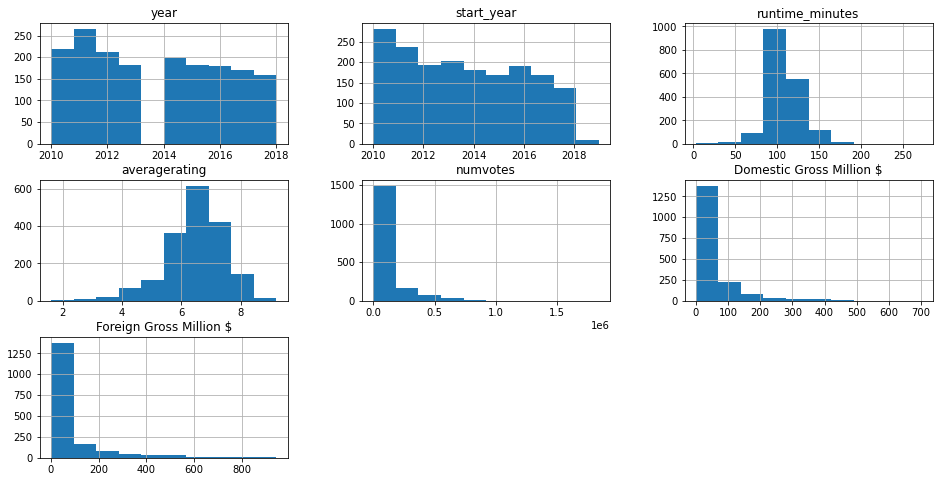

In [32]:
#quick visual check to see patterns
histograms = complete_df.hist(figsize=(16,8))

Text(0, 0.5, 'Frequency')

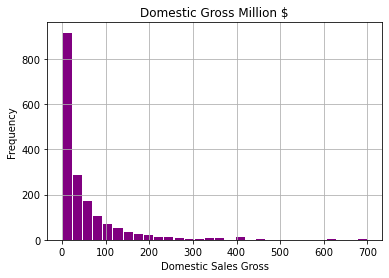

In [33]:
#zone in to see better frequency of Domestic Sales
fig=complete_df.hist(column='Domestic Gross Million $', bins=30, grid=True, rwidth=.9, color='purple')
fig[0][0].set_xlabel("Domestic Sales Gross")
fig[0][0].set_ylabel("Frequency")

Text(0.5, 1.0, 'Gross Domestic Sales')

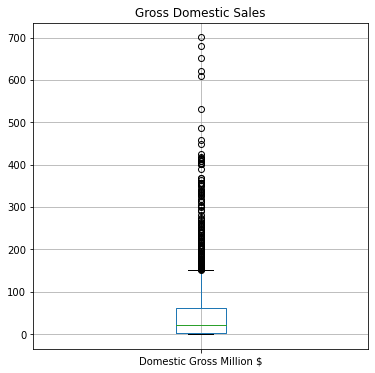

In [34]:
#boxplot of Domestic Gross Sales
domgrossbp=complete_df.boxplot(column='Domestic Gross Million $', figsize=(6,6))
plt.title('Gross Domestic Sales')

Text(0, 0.5, 'Frequency')

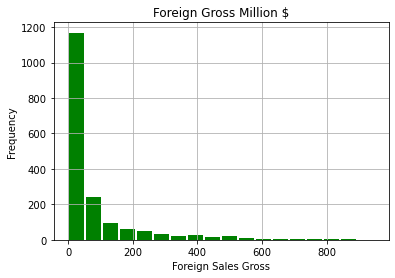

In [35]:
#zone in to see better frequency of Foreign Sales
figb=complete_df.hist(column='Foreign Gross Million $', bins=18, grid=True, rwidth=.9, color='green')
figb[0][0].set_xlabel("Foreign Sales Gross")
figb[0][0].set_ylabel("Frequency")

Text(0.5, 1.0, 'Foreign Gross Sales')

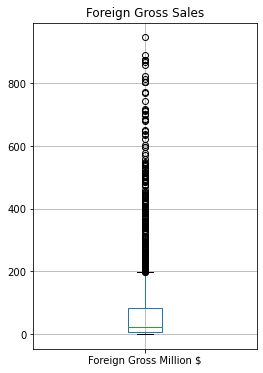

In [36]:
#boxplot of Foreign Gross Sales
foreigngrossbp=complete_df.boxplot(column='Foreign Gross Million $', figsize=(4,6))
plt.title('Foreign Gross Sales')

Text(0.5, 1.0, 'Average Rating ')

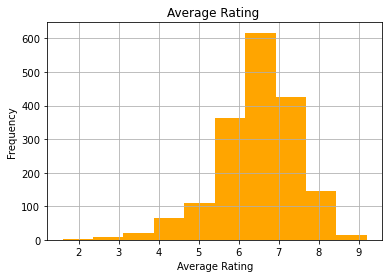

In [37]:
#zone in to see frequency of average ratings
figc=complete_df.hist(column='averagerating', bins=10, grid=True, rwidth=10, color='orange')
figc[0][0].set_xlabel("Average Rating")
figc[0][0].set_ylabel("Frequency")
figc[0][0].set_title('Average Rating ')

Text(0.5, 1.0, 'Average Rating')

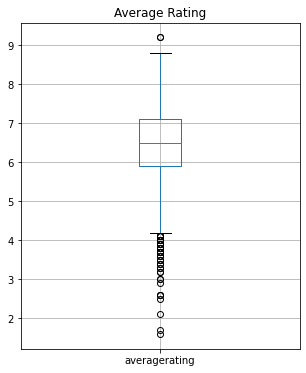

In [38]:
#boxplot of average ratings data
averatingbp=complete_df.boxplot(column='averagerating', figsize=(5, 6))
plt.title('Average Rating')

In [39]:
#check column names for further analysis on data
complete_df.columns

Index(['year', 'start_year', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'Domestic Gross Million $', 'Foreign Gross Million $'],
      dtype='object')

In [40]:
#create dataset from top 20 values in AVERAGERATING and display by genre
averageratingtop20_len=complete_df.nlargest(20,'averagerating')[['genres','averagerating']]\

averageratingtop20_len

,genres,averagerating
The Runaways,Adventure,9.2
The Wall,Documentary,9.2
Burn the Stage: The Movie,"Documentary,Music",8.8
Inception,"Action,Adventure,Sci-Fi",8.8
Coriolanus,"Drama,History,War",8.7
Eyes Wide Open,"Documentary,History",8.7
Interstellar,"Adventure,Drama,Sci-Fi",8.6
Kin,"Drama,Music",8.6
Senna,"Biography,Documentary,Sport",8.6
Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5


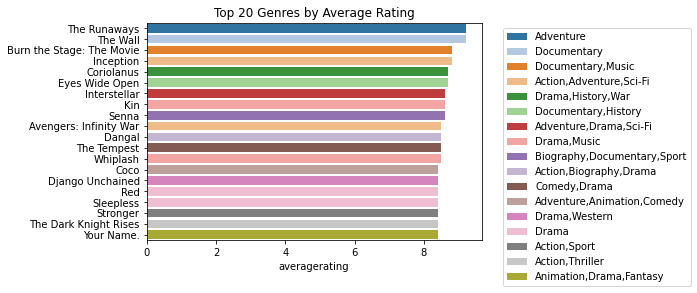

In [43]:
#create horizontal barchart of top 20 genres according to the average ratings
sns.barplot(
    x='averagerating', y=averageratingtop20_len.index,
    data=averageratingtop20_len,
    hue='genres', dodge=False,
    palette='tab20'  # Notice this parameter
).set(title='Top 20 Genres by Average Rating')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)

In [44]:
##create dataset from top 20 values in number of votes and display by genre
top20_len=complete_df.nlargest(20,'numvotes')[['genres','numvotes','year']]
top20_len

,genres,numvotes,year
Inception,"Action,Adventure,Sci-Fi",1841066.0,2010
The Dark Knight Rises,"Action,Thriller",1387769.0,2012
Interstellar,"Adventure,Drama,Sci-Fi",1299334.0,2014
Django Unchained,"Drama,Western",1211405.0,2012
The Wolf of Wall Street,"Biography,Crime,Drama",1035358.0,2013
Shutter Island,"Mystery,Thriller",1005960.0,2010
Guardians of the Galaxy,"Action,Adventure,Comedy",948394.0,2014
Deadpool,"Action,Adventure,Comedy",820847.0,2016
The Hunger Games,"Action,Adventure,Sci-Fi",795227.0,2012
Mad Max: Fury Road,"Action,Adventure,Sci-Fi",780910.0,2015


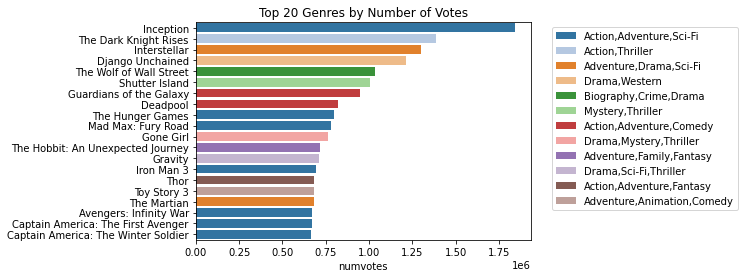

In [45]:
##create horizontal barchart of top 20 genres according to the number of votes
sns.barplot(
    x='numvotes', y=top20_len.index,
    data=top20_len,
    hue='genres', dodge=False,
    palette='tab20'  # Notice this parameter
).set(title='Top 20 Genres by Number of Votes')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)




In [46]:
#create dataset from top 20 Domestic Gross sales and display by genre
top20_domestic=complete_df.nlargest(20,'Domestic Gross Million $')[['genres','Domestic Gross Million $']]
top20_domestic

,genres,Domestic Gross Million $
Black Panther,"Action,Adventure,Sci-Fi",700.1
Avengers: Infinity War,"Action,Adventure,Sci-Fi",678.8
Jurassic World,"Action,Adventure,Sci-Fi",652.3
Star Wars: The Last Jedi,"Action,Adventure,Fantasy",620.2
Incredibles 2,"Action,Adventure,Animation",608.6
Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",532.2
Finding Dory,"Adventure,Animation,Comedy",486.3
Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",459.0
The Dark Knight Rises,"Action,Thriller",448.1
The Hunger Games: Catching Fire,"Action,Adventure,Sci-Fi",424.7


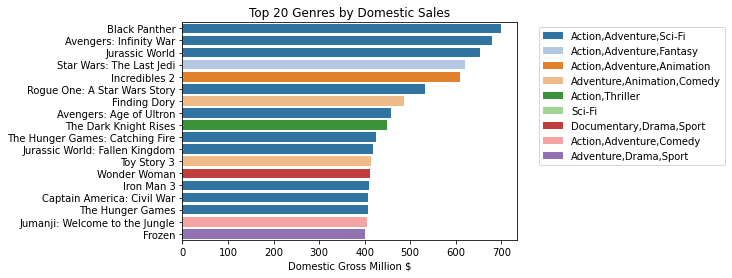

In [47]:
#create horizontal barchart of top 20 genres according to the Domestic Gross Sales
sns.barplot(
    x='Domestic Gross Million $', y=top20_domestic.index,
    data=top20_domestic,
    hue='genres', dodge=False,
    palette='tab20'  # Notice this parameter
).set(title='Top 20 Genres by Domestic Sales')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)




In [48]:
#create dataset from top 20 Foreign Gross sales and display by genre
top20_foreign=complete_df.nlargest(20,'Foreign Gross Million $')[['genres','Foreign Gross Million $']]
top20_foreign

,genres,Foreign Gross Million $
Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",946.4
Jurassic World: Fallen Kingdom,"Action,Adventure,Sci-Fi",891.8
Frozen,"Adventure,Drama,Sport",875.7
Frozen,"Fantasy,Romance",875.7
Frozen,"Adventure,Animation,Comedy",875.7
Wolf Warrior 2,"Action,Drama,Thriller",867.6
Transformers: Age of Extinction,"Action,Adventure,Sci-Fi",858.6
Minions,"Adventure,Animation,Comedy",823.4
Aquaman,"Action,Adventure,Fantasy",812.7
Iron Man 3,"Action,Adventure,Sci-Fi",805.8


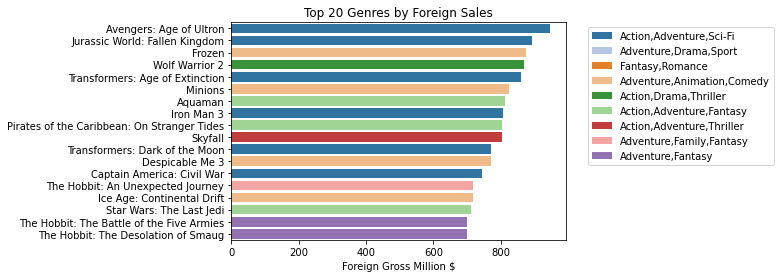

In [49]:
#create horizontal barchart of top 20 genres according to the Foreign Gross Sales
sns.barplot(
    x='Foreign Gross Million $', y=top20_foreign.index,
    data=top20_foreign,
    hue='genres', dodge=False,
    palette='tab20'  # Notice this parameter
).set(title='Top 20 Genres by Foreign Sales')
plt.legend(bbox_to_anchor=(1.05,1),loc=2)



## Evaluation

3 of the above graphs, Domestic Gross Sales, Foreign Gross Sales and Number of Votes clearly show that Adventure, Action and Sci-Fi combination are most successful in Domestic and Foreign Gross Sales and also in the average rating given. 
Its clear also to see that the adventure genre is popular across the board especially when elements of animation, action and or comedy are also included.

The 4th graph showing Top 20 Average Ratings shows Adventure as top as a solo genre.



To improve confidence in the results next time I would:-

Include the movie classification  This could have narrowed down the target audience the most successful movies were aimed at i.e PG etc.

Broken the data into the relevant years to see if there are changes year by year in the top genres of movies, see if audience tastes change over time.




***


## Conclusions

This analysis leads to three recommendations regarding types of movies that are successful:-
* Movies with the genre combination Action, Adventure & Sci-Fi topped the leaderboard in both Domestic and Foreign Gross Sales, this combination is obviously a hit at the box office worldwide, make this the first type of movie to produce for success.
*Movies with Adventure, Animation and Comedy were the next most successful in Foreign Gross Sales and Domestic Sales, use this combination as the next or alternative type of movie to produce.
*Movies in the top 20 number of votes yielded slighly different results but Action, Adventure and Sci-Fi combination did come out 1st still. 
*Adventure genre seems constant in all the above graphs so must be a key element of any movie to be produced.
***
Questions to consider:
* Limitations-Could the same movie be classified into different genres by different audiences? Who classifies the genres for each movie? Can the classification of genres be improved to provide a more benchmark approach?
*Future analysis could include the movie classification ie PG, MA etc to see which audience the most successful movies were made for.

***